In [2]:
import torch
import torch.nn as nn
import numpy as np
import scipy.io
from matplotlib import pyplot as plt
import matplotlib.animation as animation

nu = 0.01 # From very high Reynolds number

# Load data and create training dataset
file = 'Cleaned_APS360_0012_dt0001_2.mat'
data = scipy.io.loadmat(f"./Data/{file}")

##### Bounds for training ######
start_time = 0
end_time = 140

U_star = data['U_star'][...,start_time:end_time]  # N x 2 x T
P_star = data['p_star'][...,start_time:end_time]  # N x T
t_star = data['t'][start_time:end_time]  # T x 1
X_star = data['X_star']  # N x 2

N = X_star.shape[0]
T = t_star.shape[0]

# Rearrange Data
XX = np.tile(X_star[:, 0:1], (1, T))  # N x T
YY = np.tile(X_star[:, 1:2], (1, T))  # N x T
TT = np.tile(t_star, (1, N)).T  # N x T

UU = U_star[:, 0, :]  # N x T
VV = U_star[:, 1, :]  # N x T
PP = P_star  # N x T

x = XX.flatten()[:, None]  # NT x 1
y = YY.flatten()[:, None]  # NT x 1
t = TT.flatten()[:, None]  # NT x 1

u = UU.flatten()[:, None]  # NT x 1
v = VV.flatten()[:, None]  # NT x 1
p = PP.flatten()[:, None]  # NT x 1

# Randomly sample data without using N_train
idx = np.random.choice(N * T, 5000, replace=False)
x_train = torch.tensor(x[idx, :], dtype=torch.float32, requires_grad=True)
y_train = torch.tensor(y[idx, :], dtype=torch.float32, requires_grad=True)
t_train = torch.tensor(t[idx, :], dtype=torch.float32, requires_grad=True)
u_train = torch.tensor(u[idx, :], dtype=torch.float32)
v_train = torch.tensor(v[idx, :], dtype=torch.float32)
p_train = torch.tensor(p[idx, :], dtype=torch.float32)

# Define a simple ResNet block
class ResNetBlock(nn.Module):
    def __init__(self, in_features, out_features):
        super(ResNetBlock, self).__init__()
        self.linear = nn.Linear(in_features, out_features)
        self.activation = nn.Tanh()
    
    def forward(self, x):
        return self.activation(self.linear(x)) + x

# Define the ResNet-style neural network with 7 hidden layers
class ResNet(nn.Module):
    def __init__(self):
        super(ResNet, self).__init__()
        self.input_layer = nn.Linear(3, 100)
        self.res_block1 = ResNetBlock(100, 100)
        self.res_block2 = ResNetBlock(100, 100)
        self.res_block3 = ResNetBlock(100, 100)
        self.res_block4 = ResNetBlock(100, 100)
        self.res_block5 = ResNetBlock(100, 100)
        self.res_block6 = ResNetBlock(100, 100)
        self.res_block7 = ResNetBlock(100, 100)
        self.res_block8 = ResNetBlock(100, 100)
        self.res_block9 = ResNetBlock(100, 100)
        self.res_block10 = ResNetBlock(100, 100)
        self.res_block11 = ResNetBlock(100, 100)
        self.res_block12 = ResNetBlock(100, 100)
        self.res_block13 = ResNetBlock(100, 100)
        self.res_block14 = ResNetBlock(100, 100)
        self.res_block15 = ResNetBlock(100, 100)
        self.res_block16 = ResNetBlock(100, 100)
        self.res_block17 = ResNetBlock(100, 100)
        self.res_block18 = ResNetBlock(100, 100)
        self.res_block19 = ResNetBlock(100, 100)
        self.res_block20 = ResNetBlock(100, 100)
        self.output_layer = nn.Linear(100, 3)
        self.activation = nn.Tanh()
    
    def forward(self, x):
        x = self.activation(self.input_layer(x))
        x = self.res_block1(x)
        x = self.res_block2(x)
        x = self.res_block3(x)
        x = self.res_block4(x)
        x = self.res_block5(x)
        x = self.res_block6(x)
        x = self.res_block7(x)
        x = self.res_block8(x)
        x = self.res_block9(x)
        x = self.res_block10(x)
        x = self.res_block11(x)
        x = self.res_block12(x)
        x = self.res_block13(x)
        x = self.res_block14(x)
        x = self.res_block15(x)
        x = self.res_block16(x)
        x = self.res_block17(x)
        x = self.res_block18(x)
        x = self.res_block19(x)
        x = self.res_block20(x)
        x = self.output_layer(x)
        return x

net = ResNet()

# Define the loss function and optimizer
mse = nn.MSELoss()

def create_pde(x, y, t):
    res = net(torch.hstack((x, y, t)))
    psi, p = res[:, 0:1], res[:, 1:2]

    u = torch.autograd.grad(psi, y, grad_outputs=torch.ones_like(psi), create_graph=True)[0]  
    v = -1. * torch.autograd.grad(psi, x, grad_outputs=torch.ones_like(psi), create_graph=True)[0]

    u_x = torch.autograd.grad(u, x, grad_outputs=torch.ones_like(u), create_graph=True)[0]
    u_xx = torch.autograd.grad(u_x, x, grad_outputs=torch.ones_like(u_x), create_graph=True)[0]
    u_y = torch.autograd.grad(u, y, grad_outputs=torch.ones_like(u), create_graph=True)[0]
    u_yy = torch.autograd.grad(u_y, y, grad_outputs=torch.ones_like(u_y), create_graph=True)[0]
    u_t = torch.autograd.grad(u, t, grad_outputs=torch.ones_like(u), create_graph=True)[0]

    v_x = torch.autograd.grad(v, x, grad_outputs=torch.ones_like(v), create_graph=True)[0]
    v_xx = torch.autograd.grad(v_x, x, grad_outputs=torch.ones_like(v_x), create_graph=True)[0]
    v_y = torch.autograd.grad(v, y, grad_outputs=torch.ones_like(v), create_graph=True)[0]
    v_yy = torch.autograd.grad(v_y, y, grad_outputs=torch.ones_like(v_y), create_graph=True)[0]
    v_t = torch.autograd.grad(v, t, grad_outputs=torch.ones_like(v), create_graph=True)[0]

    p_x = torch.autograd.grad(p, x, grad_outputs=torch.ones_like(p), create_graph=True)[0]
    p_y = torch.autograd.grad(p, y, grad_outputs=torch.ones_like(p), create_graph=True)[0]

    f = u_t + u * u_x + v * u_y + p_x - nu * (u_xx + u_yy)
    g = v_t + u * v_x + v * v_y + p_y - nu * (v_xx + v_yy)

    return u, v, p, f, g


LBFGS Iteration 10, Loss: 1997514.875
LBFGS Iteration 20, Loss: 1985703.875
LBFGS Iteration 30, Loss: 1967086.75
LBFGS Iteration 40, Loss: 1951659.25
LBFGS Iteration 50, Loss: 1938169.25
LBFGS Iteration 60, Loss: 1921280.125
LBFGS Iteration 70, Loss: 1911816.75
LBFGS Iteration 80, Loss: 1900934.375
LBFGS Iteration 90, Loss: 1892731.875
LBFGS Iteration 100, Loss: 1882844.375
LBFGS Iteration 110, Loss: 1867839.5
LBFGS Iteration 120, Loss: 1859273.625
LBFGS Iteration 130, Loss: 1842253.625
LBFGS Iteration 140, Loss: 1834127.25
LBFGS Iteration 150, Loss: 1826839.0
LBFGS Iteration 160, Loss: 1823396.875
LBFGS Iteration 170, Loss: 1817841.0
LBFGS Iteration 180, Loss: 1811191.125
LBFGS Iteration 190, Loss: 1800950.625
LBFGS Iteration 200, Loss: 1795566.25
LBFGS Iteration 210, Loss: 1788658.625
LBFGS Iteration 220, Loss: 1786664.625
LBFGS Iteration 230, Loss: 1782564.375
LBFGS Iteration 240, Loss: 1781005.25
LBFGS Iteration 250, Loss: 1779708.25
LBFGS Iteration 260, Loss: 1778404.125
LBFGS Ite

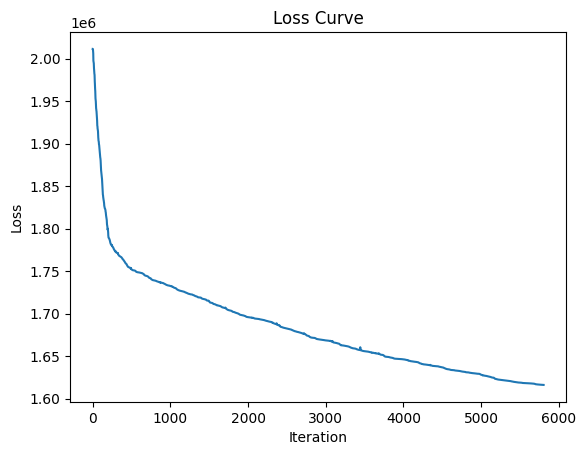

In [1]:
# Train the model using Adam and LBFGS
optimizer_adam = torch.optim.Adam(net.parameters(), lr=0.001)
optimizer_lbfgs = torch.optim.LBFGS(net.parameters(), lr=0.1, max_iter=200000, max_eval=500000,
                                    history_size=50, tolerance_grad=0.5 * np.finfo(float).eps, tolerance_change=0.5 * np.finfo(float).eps,
                                    line_search_fn="strong_wolfe")

loss_history = []
lbfgs_iter = 0  # Initialize the LBFGS iteration counter
patience = 10000  # Number of iterations with no significant improvement before stopping
min_delta = 1e-7  # Minimum change to qualify as an improvement
best_loss = float('inf')
patience_counter = 0

# Training loop with Adam
# for epoch in range(100000):
#     def closure():
#         optimizer_adam.zero_grad()

#         u_prediction, v_prediction, p_prediction, f_prediction, g_prediction = create_pde(x_train, y_train, t_train)
#         u_loss = mse(u_prediction, u_train)
#         v_loss = mse(v_prediction, v_train)
#         p_loss = mse(p_prediction, p_train)
#         f_loss = mse(f_prediction, torch.zeros_like(f_prediction))
#         g_loss = mse(g_prediction, torch.zeros_like(g_prediction))

#         loss = u_loss + v_loss + p_loss + f_loss + g_loss
#         loss.backward()
#         return loss
    
#     optimizer_adam.step(closure)
#     loss = closure().item()
#     loss_history.append(loss)
    
#     if epoch % 10 == 0:
#         print(f'Adam Epoch {epoch}, Loss: {loss}')

# Fine-tuning with LBFGS and early stopping
def closure():
    global lbfgs_iter, best_loss, patience_counter  # Access the global iteration variables
    optimizer_lbfgs.zero_grad()

    u_prediction, v_prediction, p_prediction, f_prediction, g_prediction = create_pde(x_train, y_train, t_train)
    u_loss = mse(u_prediction, u_train)
    v_loss = mse(v_prediction, v_train)
    p_loss = mse(p_prediction, p_train)
    f_loss = mse(f_prediction, torch.zeros_like(f_prediction))
    g_loss = mse(g_prediction, torch.zeros_like(g_prediction))

    loss = u_loss + v_loss + p_loss + f_loss + g_loss
    loss.backward()
    loss_history.append(loss.item())

    # Print the current iteration and loss
    lbfgs_iter += 1
    if lbfgs_iter % 10 == 0:
        print(f'LBFGS Iteration {lbfgs_iter}, Loss: {loss.item()}')

    # Early stopping logic
    # if loss.item() < best_loss - min_delta:
    #     best_loss = loss.item()
    #     patience_counter = 0
    # else:
    #     patience_counter += 1
    #     if patience_counter >= patience:
    #         print("Early stopping triggered")
    #         return loss

    return loss

optimizer_lbfgs.step(closure)

# Save the trained model
torch.save(net.state_dict(), './models/20x100lyrs_NACA0012_extrapolate(0-140).pt')

# Plot the loss curve
plt.figure()
plt.plot(loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

np.savetxt("./Results/20x100lyrs_NACA0012_histloss.csv", loss_history, delimiter=",") 

In [3]:
net = ResNet()
state = torch.load('./models/20x100lyrs_NACA0012_extrapolate(0-140).pt')
net.load_state_dict(state)
print("Model loaded.")

Model loaded.


In [4]:
# Load the trained model and evaluate
net.eval()

x_test = torch.tensor(X_star[:, 0:1], dtype=torch.float32, requires_grad=True)
y_test = torch.tensor(X_star[:, 1:2], dtype=torch.float32, requires_grad=True)
t_test = torch.tensor(np.ones((X_star.shape[0], 1)), dtype=torch.float32, requires_grad=True)

u_out, v_out, p_out, f_out, g_out = create_pde(x_test, y_test, t_test)


# Function to create and save an animation for a specific field
def create_animation(field_name, values_fn, vmin, vmax, filename):
    fig, ax = plt.subplots()
    
    # Initialize the first frame
    t = torch.tensor(np.full(x_test.shape, t_star[0]), dtype=torch.float32, requires_grad=True)
    u_out, v_out, p_out, _, _ = create_pde(x_test, y_test, t)
    field_values = values_fn(u_out, v_out, p_out).detach().cpu().numpy().flatten()
    
    contour = ax.tricontourf(x_test.detach().numpy().flatten(), y_test.detach().numpy().flatten(), field_values, levels=20, cmap='jet', vmin=vmin, vmax=vmax)
    colorbar = fig.colorbar(contour, ax=ax, label=field_name)  # Add colorbar once

    ax.set_xlim(-0.5, 8)  # Set x-axis limits
    ax.set_ylim(-2, 2)  # Set y-axis limits
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'{field_name} at t = {t_star[0][0]}')

    def animate(i):
        nonlocal contour
        for c in contour.collections:
            c.remove()
        t = torch.tensor(np.full(x_test.shape, t_star[i]), dtype=torch.float32, requires_grad=True)
        u_out, v_out, p_out, _, _ = create_pde(x_test, y_test, t)
        field_values = values_fn(u_out, v_out, p_out).detach().cpu().numpy().flatten()
        contour = ax.tricontourf(x_test.detach().numpy().flatten(), y_test.detach().numpy().flatten(), field_values, levels=20, cmap='jet', vmin=vmin, vmax=vmax)
        ax.set_title(f'{field_name} at t = {t_star[i][0]}')

    ani = animation.FuncAnimation(fig, animate, frames=T, interval=50, blit=False)
    ani.save(filename, writer='imagemagick', fps=10)
    plt.close(fig)

# Determine value ranges for proper color scaling
t = torch.tensor(np.full(x_test.shape, t_star[0]), dtype=torch.float32, requires_grad=True)
u_out, v_out, p_out, _, _ = create_pde(x_test, y_test, t)  # Extract only the first three values

vmin_p, vmax_p = torch.min(p_out).item(), torch.max(p_out).item()
vmin_u, vmax_u = torch.min(u_out).item(), torch.max(u_out).item()
vmin_v, vmax_v = torch.min(v_out).item(), torch.max(v_out).item()

# Create and save animations for each field
create_animation('Pressure Field', lambda u_out, v_out, p_out: p_out, vmin_p, vmax_p, '0012_pressure_animation.gif')
create_animation('U Velocity Field', lambda u_out, v_out, p_out: u_out, vmin_u, vmax_u, '0012_u_velocity_animation.gif')
create_animation('V Velocity Field', lambda u_out, v_out, p_out: v_out, vmin_v, vmax_v, '0012_v_velocity_animation.gif')

plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.
/tmp/ipykernel_16886/599473574.py:31: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  for c in contour.collections:


: 